# Convolutional Neural Network (CNN)
### 이미지를 위해 사용되는 인공 신경망의 한 종류. 이미지를 여러 개로 분할하여 처리.
### 이미지가 왜곡되더라도 부분적 특성을 추출할 수 있어 올바른 성능을 낼 수 있다.

In [1]:
#합성곱층, 풀링층 반복
#합성곱층 (패딩, 필터->특성맵, 스트라이드)
#풀링층 (풀링->특성맵)

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1) / 255.0 #케라스 합성곱 층은 3차원 입력을 기대->흑백이미지 임으로 이미지 가로,세로,1.
#컬러면 가로,세로,3
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()

In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
#필터 갯수 32개, 필터 크기 3*3*1(깊이인 1은 자동), 패딩 same패딩.

2022-08-17 17:11:14.059273: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-17 17:11:14.060353: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.add(keras.layers.MaxPooling2D(2)) #2*2 맥스 풀링

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
#필터 64개, 필터 사이즈 3*3*32(깊이 32는 자동), 패딩 same패딩
model.add(keras.layers.MaxPooling2D(2)) #2*2 맥스 풀링

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) #drop out 층
model.add(keras.layers.Dense(10, activation='softmax'))
#출력을 위한 dense층

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

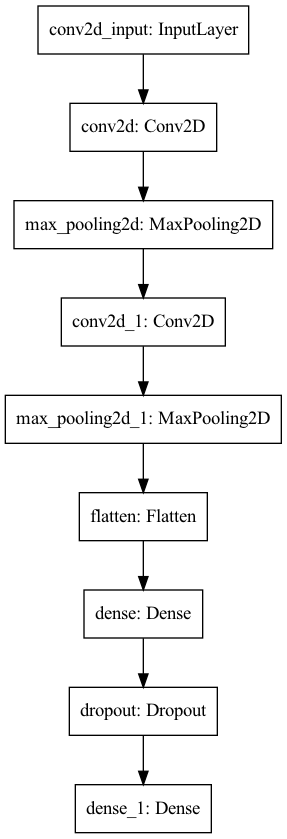

In [9]:
keras.utils.plot_model(model)

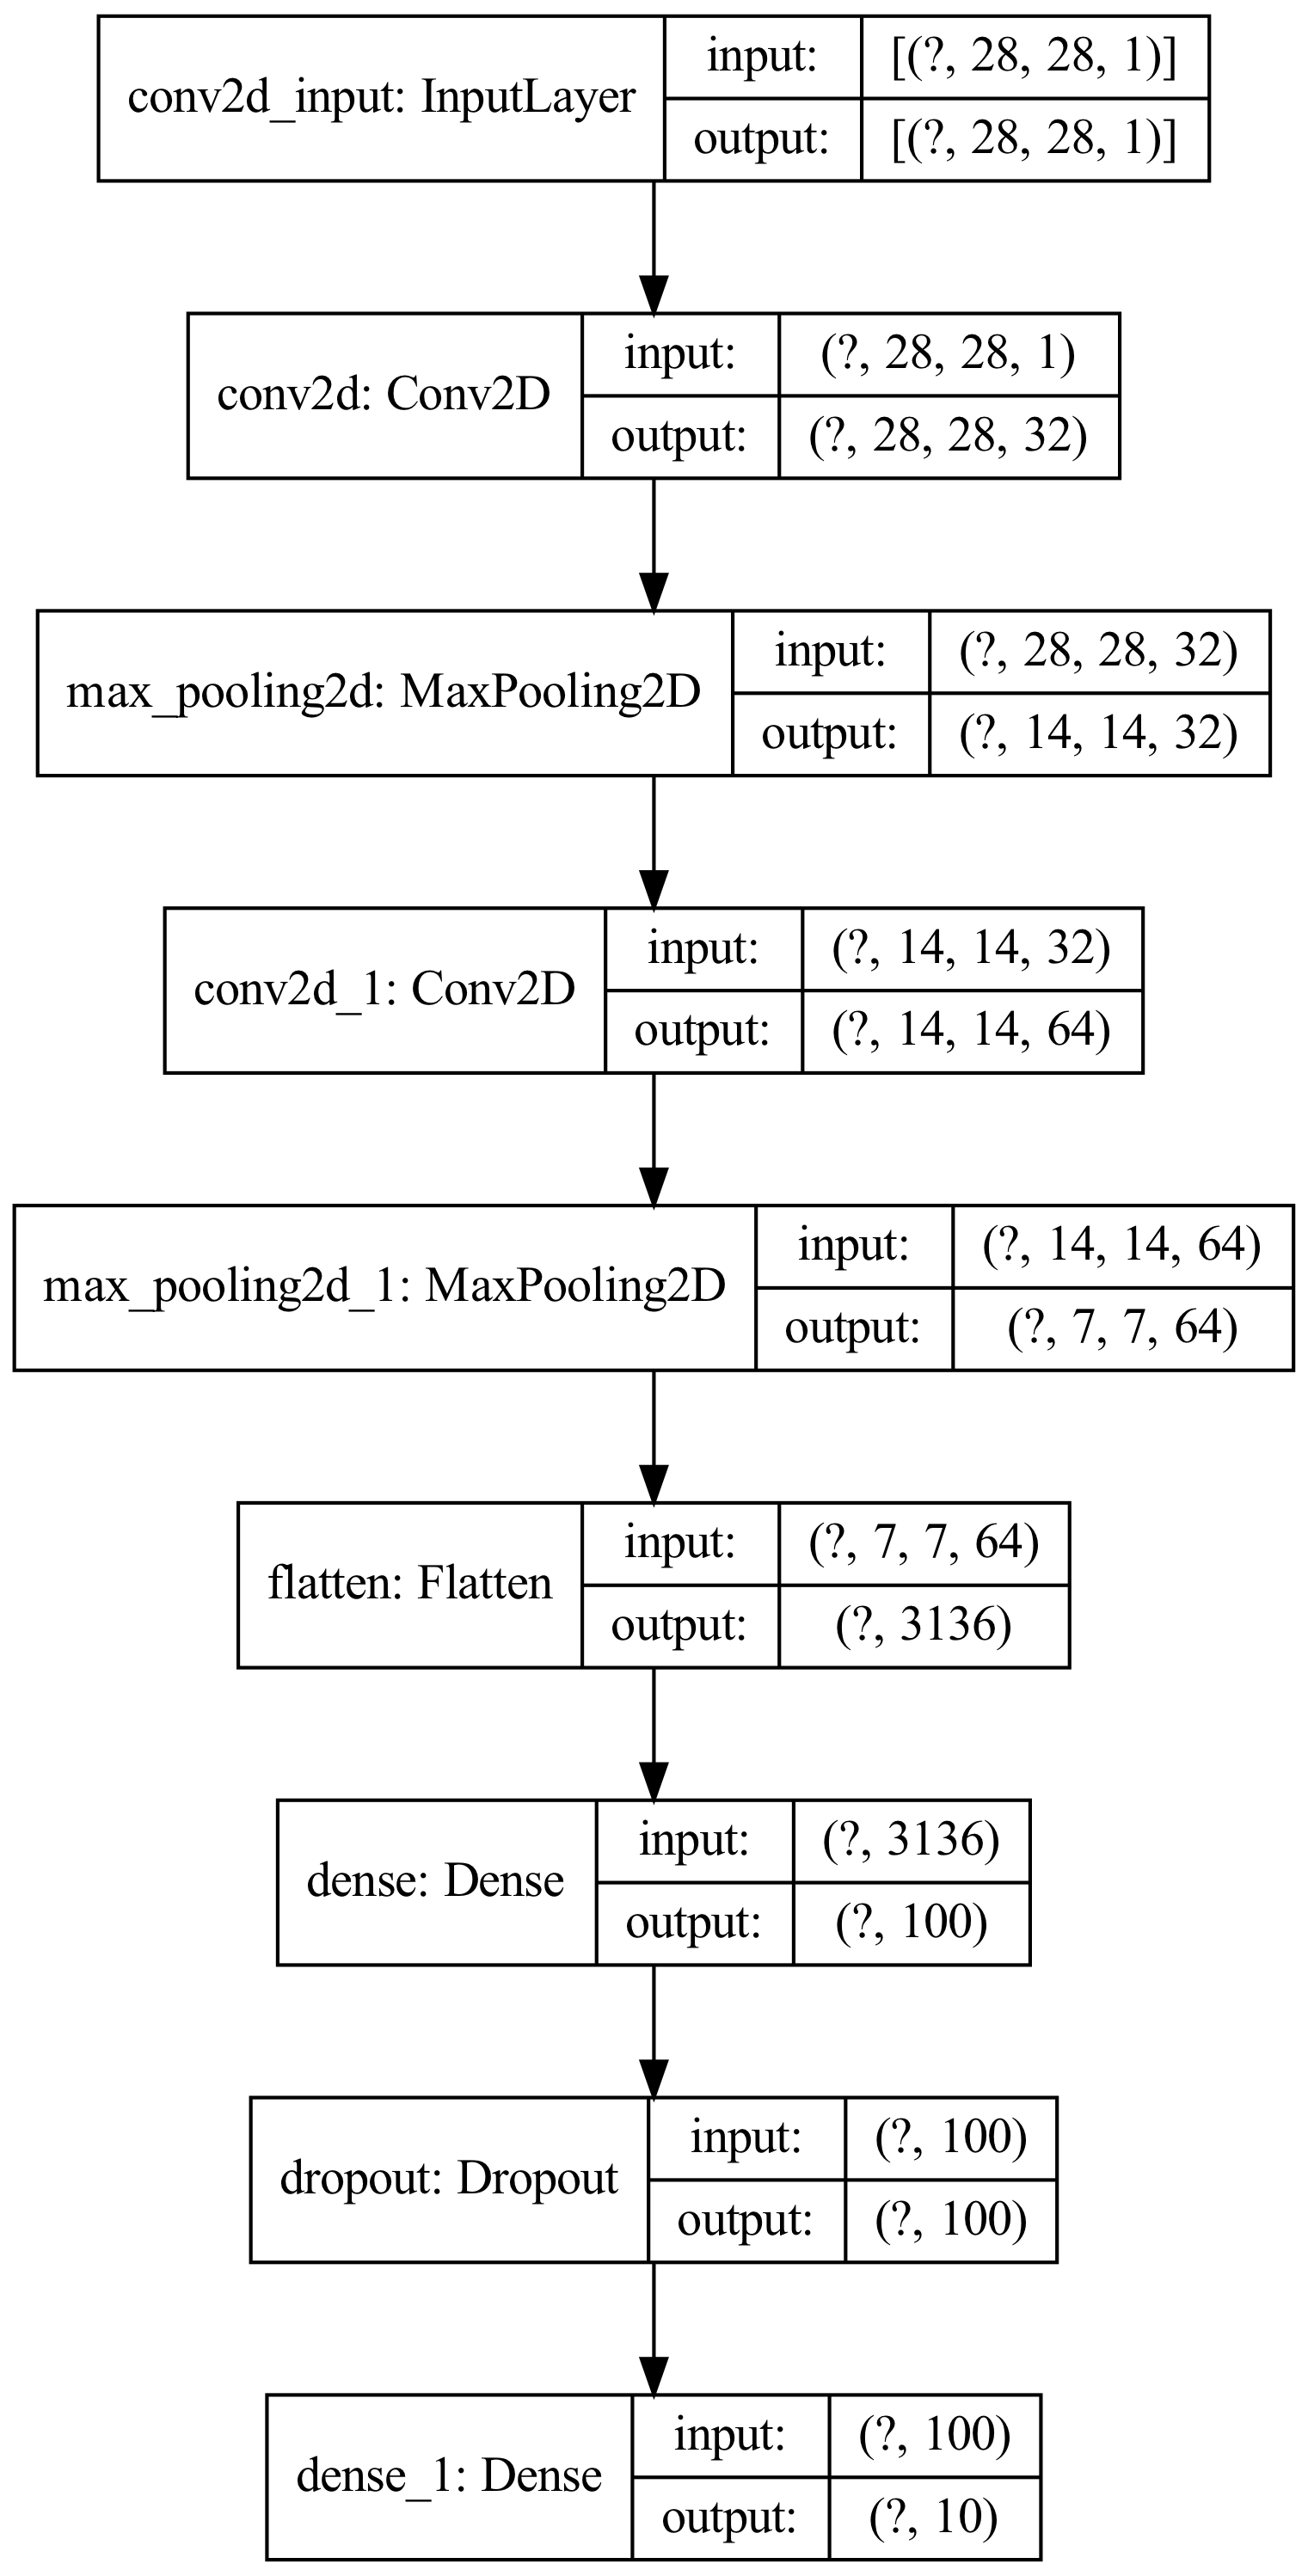

In [10]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])                              

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 322s 7ms/sample - loss: 0.5215 - accuracy: 0.8121 - val_loss: 0.3296 - val_accuracy: 0.8794
Epoch 2/20
48000/48000 [==============================] - 186s 4ms/sample - loss: 0.3459 - accuracy: 0.8769 - val_loss: 0.2740 - val_accuracy: 0.8978
Epoch 3/20
48000/48000 [==============================] - 180s 4ms/sample - loss: 0.2940 - accuracy: 0.8945 - val_loss: 0.2467 - val_accuracy: 0.9072
Epoch 4/20
48000/48000 [==============================] - 186s 4ms/sample - loss: 0.2581 - accuracy: 0.9081 - val_loss: 0.2378 - val_accuracy: 0.9133
Epoch 5/20
48000/48000 [==============================] - 181s 4ms/sample - loss: 0.2359 - accuracy: 0.9131 - val_loss: 0.2267 - val_accuracy: 0.9166
Epoch 6/20
48000/48000 [==============================] - 1142s 24ms/sample - loss: 0.2132 - accuracy: 0.9214 - val_loss: 0.2263 - val_accuracy: 0.9170
Epoch 7/20
48000/48000 [========================

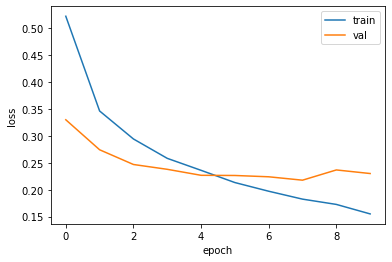

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target) #검증세트 확인

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.21762562767167887, 0.92258334]

In [15]:
#테스트 세트 평가
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled, test_target)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24460527480840683, 0.9143]